In [20]:
import numpy as np
def MapHierach( a, b):
    I = np.count_nonzero(np.logical_and(a, b))
    A=np.count_nonzero(a)
    B=np.count_nonzero(b)
    return I/A



In [2]:
# from scipy.stats import entropy
# def MI(a,b):
#     return metrics.mutual_info_score(a,b)/(entropy(a,b)+entropy(b,a))/2

In [3]:
from sklearn import metrics
def LayerHierach(A,B):
    D=[]
    for i,a in enumerate(A):
        D.append([])
        print(i)
        for j,b in enumerate(B):
            score=MapHierach(a,b)
            D[i].append(score)
    return D


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def plot(D,file):
    mask = np.zeros_like(D, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(15,15))
    sns_plot=sns.heatmap(D,cmap="Reds")
    plt.savefig(file)
    





0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

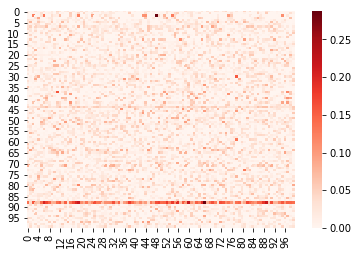

In [5]:
import numpy as np
def run(task):
    map1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map1.npy')
    map2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map2.npy')
    map3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map3.npy')
    D12=LayerHierach(map1,map2)
    D23=LayerHierach(map2,map3)
    plot(D12,'/storage/dbn/Hierarchy/'+task+'_D12.png')
    plot(D23,'/storage/dbn/Hierarchy/'+task+'_D23.png')
# from joblib import Parallel, delayed    
# tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
# Parallel(n_jobs=7)(delayed(run)(task) for task in tasks)
run('EMOTION')

    




In [9]:
task='EMOTION'
map1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map1.npy')
map2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map2.npy')
map3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map3.npy')
D12=LayerHierach(map1,map2)
D23=LayerHierach(map2,map3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [26]:
def MapOverlap( a, b):
    Intersect = np.logical_and(a, b)
    Union=np.logical_or(a, b)
    return np.count_nonzero(Intersect)/np.count_nonzero(Union)
import operator
def find_max(h,Low):
    D=[]

    for i,l in enumerate(Low):
        score=MapHierach(h,l)
        D.append(score)
    index, value = max(enumerate(D), key=operator.itemgetter(1))
    return index

print(find_max(map3[1],map2) )

83


In [28]:
print(find_max(map2[83],map1) )

88
